In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
import json
import datetime
import scipy
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
from pylab import plot, title, show , legend

import plotly
from plotly.graph_objs import Scatter, Layout

In [23]:
def GroupColFunc(row):
    week = datetime.date(row['Year'], row['Month'], row['DayofMonth']).isocalendar()[1]
    if (row['Month'] == 1 and week > 50):
        return 1.0
    else:
        if (row['Month'] == 12 and week == 1):
            return 53.0
        else:
            return week

In [24]:
def GenerateDataWithWeeks(years):
    for year in years:
        df = pd.read_csv(year+'.csv')
        woyserie = df.apply(lambda row: GroupColFunc(row), axis=1)
        df = df.assign(WeekOfYear= woyserie)
        df.to_csv(year+'wy.csv')

/home/ignacio/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



In [17]:
def plotCancellationCodesBy(df, index):  
    # (A = carrier, B = weather, C = NAS, D = security)
    var = df[df.Cancelled > 0].groupby([index,'CancellationCode'])[index].count() / df.groupby([index])[index].count()
    var.unstack().plot(kind='bar',stacked=True, color=['red','blue','green','pink'], grid=False)
    plt.show()

In [39]:
years = ['2003','2004','2005','2006','2007','2008']

totalW = pd.Series()
cancelledW = pd.Series()
cancelledAW = pd.Series()
cancelledBW = pd.Series()
delayW = pd.Series()
delayCW = pd.Series()
delaywW = pd.Series()
delayNW = pd.Series()
delaySW = pd.Series()
delayLW = pd.Series()

totalM = pd.Series()
cancelledM = pd.Series()
cancelledAM = pd.Series()
cancelledBM = pd.Series()
delayM = pd.Series()
delayCM = pd.Series()
delaywM = pd.Series()
delayNM = pd.Series()
delaySM = pd.Series()
delayLM = pd.Series()

totalY = pd.Series()
cancelledY = pd.Series()
cancelledAY = pd.Series()
cancelledBY = pd.Series()
delayY = pd.Series()
delayCY = pd.Series()
delaywY = pd.Series()
delayNY = pd.Series()
delaySY = pd.Series()
delayLY = pd.Series()
for year in years:
    df = pd.read_csv(year+'wy.csv')

    #_Vuelos Totales Por Semana 
    ser = df.groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    totalW = totalW.append(ser)
    #_Cancelados Por Semana 
    ser = df[df.Cancelled > 0].groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    cancelledW = cancelledW.append(ser)
    #_Cancelados Aerolinea Por Semana 
    ser = df[df.CancellationCode == 'A'].groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    cancelledAW = cancelledAW.append(ser)
    #_Cancelados Mal Tiempo Por Semana 
    ser = df[df.CancellationCode == 'B'].groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    cancelledBW = cancelledBW.append(ser)    
    # Delay Por Semana
    ser = df[(df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)].groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    delayW = delayW.append(ser)
    # Carrier Delay Por Semana
    ser = df[df.CarrierDelay > 0].groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    delayCW = delayCW.append(ser)
    # Mal Tiempo Delay Por Semana
    ser = df[df.WeatherDelay > 0].groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    delaywW = delaywW.append(ser)
    # Nas Delay Por Semana
    ser = df[df.NASDelay > 0].groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    delayNW = delayNW.append(ser)
    # Security Delay Por Semana 
    ser = df[df.SecurityDelay > 0].groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    delaySW = delaySW.append(ser)
    # LateAircraft Delay Por Semana
    ser = df[df.LateAircraftDelay > 0].groupby(['Year','WeekOfYear'])['WeekOfYear'].count()
    delayLW = delayLW.append(ser)

    #_Vuelos Totales Por Mes 
    ser = df.groupby(['Year','Month'])['Month'].count()
    totalM = totalM.append(ser)
    #_Cancelados Por Mes 
    ser = df[df.Cancelled > 0].groupby(['Year','Month'])['Month'].count()
    cancelledM = cancelledM.append(ser)
    #_Cancelados Aerolinea Por Mes 
    ser = df[df.CancellationCode == 'A'].groupby(['Year','Month'])['Month'].count()
    cancelledAM = cancelledAM.append(ser)
    #_Cancelados Mal Tiempo Por Mes 
    ser = df[df.CancellationCode == 'B'].groupby(['Year','Month'])['Month'].count()
    cancelledBM = cancelledBM.append(ser)    
    # Delay Por Mes
    ser = df[(df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)].groupby(['Year','Month'])['Month'].count()
    delayM = delayM.append(ser)
    # Carrier Delay Por Mes
    ser = df[df.CarrierDelay > 0].groupby(['Year','Month'])['Month'].count()
    delayCM = delayCM.append(ser)
    # Mal Tiempo Delay Por Mes
    ser = df[df.WeatherDelay > 0].groupby(['Year','Month'])['Month'].count()
    delaywM = delaywM.append(ser)
    # Nas Delay Por Mes
    ser = df[df.NASDelay > 0].groupby(['Year','Month'])['Month'].count()
    delayNM = delayNM.append(ser)
    # Security Delay Por Mes 
    ser = df[df.SecurityDelay > 0].groupby(['Year','Month'])['Month'].count()
    delaySM = delaySM.append(ser)
    # LateAircraft Delay Por Mes
    ser = df[df.LateAircraftDelay > 0].groupby(['Year','Month'])['Month'].count()
    delayLM = delayLM.append(ser)

    #_Vuelos Totales Por Año 
    ser = df.groupby(['Year'])['Year'].count()
    totalY = totalY.append(ser)
    #_Cancelados Por Año 
    ser = df[df.Cancelled > 0].groupby(['Year'])['Year'].count()
    cancelledY = cancelledY.append(ser)
    #_Cancelados Aerolinea Por Año 
    ser = df[df.CancellationCode == 'A'].groupby(['Year'])['Year'].count()
    cancelledAY = cancelledAY.append(ser)
    #_Cancelados Mal Tiempo Por Año 
    ser = df[df.CancellationCode == 'B'].groupby(['Year'])['Year'].count()
    cancelledBY = cancelledBY.append(ser)    
    # Delay Por Año
    ser = df[(df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)].groupby(['Year'])['Year'].count()
    delayY = delayY.append(ser)
    # Carrier Delay Por Año
    ser = df[df.CarrierDelay > 0].groupby(['Year'])['Year'].count()
    delayCY = delayCY.append(ser)
    # Mal Tiempo Delay Por Año
    ser = df[df.WeatherDelay > 0].groupby(['Year'])['Year'].count()
    delaywY = delaywY.append(ser)
    # Nas Delay Por Año
    ser = df[df.NASDelay > 0].groupby(['Year'])['Year'].count()
    delayNY = delayNY.append(ser)
    # Security Delay Por Año 
    ser = df[df.SecurityDelay > 0].groupby(['Year'])['Year'].count()
    delaySY = delaySY.append(ser)
    # LateAircraft Delay Por Año
    ser = df[df.LateAircraftDelay > 0].groupby(['Year'])['Year'].count()
    delayLY = delayLY.append(ser)


/home/ignacio/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.



/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:779: OptimizeWarning:

Covariance of the parameters could not be estimated



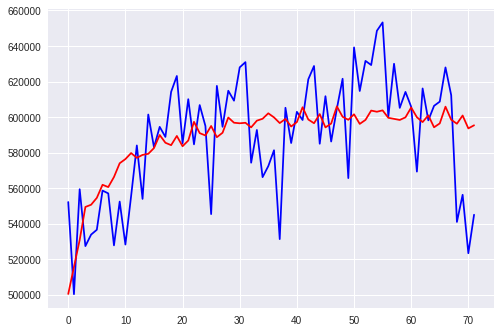

761712040.73840034

In [127]:
y = totalM.values
n = y.size
x = np.arange(0, n, 1)

def lineal(x, a, b):
    return a + b*x
def nachooriginal(x, a, b, c, d, e, f, g):
    return a*x + b * abs(np.cos(x)) + c * abs(np.sin(x)) + f * np.cos(x) + g * np.sin(x) + d * np.log(x+1) + e
def nacho(x, a, b, c, d, e, f, g, h, i, j):
    return h*(x**4) + i*(x**3) + j*(x**2) + a*x + b * abs(np.cos(x)) + c * abs(np.sin(x)) + f * np.cos(x) + g * np.sin(x) + d * np.log(x+1) + e
def cua(x, a, b, c, d, e, f, g, h, i, j, k, l):
    return a*x + b * abs(np.cos(x)) + c * abs(np.sin(x)) + f * np.cos(x) + g * np.sin(x) + d * np.log(x+1) + e + k * np.sin(x) ** 2 + l * np.cos(x) ** 2 



plt.plot(x, y, 'b-', label='data')

fun = cua
popt, pcov = optimize.curve_fit(fun, x, y)

y_pred = fun(x, *popt)
plt.plot(x, y_pred, 'r-', label='fit')
plt.show()
np.mean((y - y_pred)**2)

/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:779: OptimizeWarning:

Covariance of the parameters could not be estimated



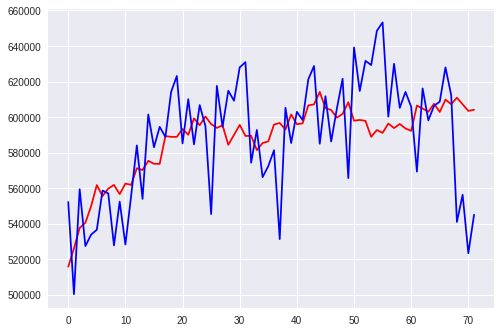

840810926.9303261

In [129]:

y_08 = totalM.values
n_08 = y_08.size
x_08 = np.arange(0, n_08, 1)

y_06 = totalM.values[0:48]
n_06 = y_06.size
x_06 = np.arange(0, n_06, 1) 


train_y = totalM.values[0:48]
train_x = np.arange(0, train_y.size, 1)
fit_y = totalM.values
fit_x = np.arange(0, fit_y.size, 1) 



fun = cua
popt, pcov = optimize.curve_fit(fun, train_x, train_y)
y_pred = fun(fit_x, *popt)
plt.plot(fit_x, y_pred, 'r-', label='fit')



plt.plot(fit_x, fit_y, 'b-', label='data')

plt.show()
np.mean((fit_y - y_pred)**2)